# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Perform a weather check on each city using a series of successive API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
lng=[]
max_temp = []
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
record=0
Set=1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record {record} of Set {Set} |  {city}")
        record=record+1
        if record ==50:
            record=0
            Set=Set+1
    except:
        print(f"City {city} not found. Skipping...")
        lat.append(np.nan)
        lng.append(np.nan)
        max_temp.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
        country.append(np.nan)
        date.append(np.nan)
        continue
print("---------------------------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------------------------")


#Include a print log of each city as it'sbeing processed (with the city number and city name).
        

Processing Record 0 of Set 1 |  nuuk
Processing Record 1 of Set 1 |  staryy nadym
Processing Record 2 of Set 1 |  avarua
Processing Record 3 of Set 1 |  yarmouth
Processing Record 4 of Set 1 |  rikitea
Processing Record 5 of Set 1 |  canoinhas
City nizhneyansk not found. Skipping...
Processing Record 6 of Set 1 |  busselton
Processing Record 7 of Set 1 |  flinders
Processing Record 8 of Set 1 |  airai
Processing Record 9 of Set 1 |  zhezkazgan
Processing Record 10 of Set 1 |  ushuaia
Processing Record 11 of Set 1 |  hilo
Processing Record 12 of Set 1 |  hobart
Processing Record 13 of Set 1 |  inuvik
City skagastrond not found. Skipping...
Processing Record 14 of Set 1 |  west wendover
City illoqqortoormiut not found. Skipping...
Processing Record 15 of Set 1 |  lebu
Processing Record 16 of Set 1 |  victoria
Processing Record 17 of Set 1 |  bluff
Processing Record 18 of Set 1 |  bambous virieux
Processing Record 19 of Set 1 |  luwingu
Processing Record 20 of Set 1 |  kapaa
Processing Re

Processing Record 28 of Set 4 |  mwingi
Processing Record 29 of Set 4 |  kirovskiy
Processing Record 30 of Set 4 |  hamilton
Processing Record 31 of Set 4 |  yanam
Processing Record 32 of Set 4 |  lucknow
Processing Record 33 of Set 4 |  wufeng
Processing Record 34 of Set 4 |  bredasdorp
Processing Record 35 of Set 4 |  miandrivazo
Processing Record 36 of Set 4 |  dod ballapur
Processing Record 37 of Set 4 |  novovarshavka
Processing Record 38 of Set 4 |  vila franca do campo
Processing Record 39 of Set 4 |  manokwari
Processing Record 40 of Set 4 |  grindavik
Processing Record 41 of Set 4 |  phonhong
Processing Record 42 of Set 4 |  san rafael
Processing Record 43 of Set 4 |  yarada
City sorvag not found. Skipping...
Processing Record 44 of Set 4 |  soyo
Processing Record 45 of Set 4 |  ozorkow
Processing Record 46 of Set 4 |  road town
Processing Record 47 of Set 4 |  hofn
Processing Record 48 of Set 4 |  arlit
Processing Record 49 of Set 4 |  agadez
Processing Record 0 of Set 5 |  k

Processing Record 13 of Set 8 |  tlapehuala
Processing Record 14 of Set 8 |  lithgow
Processing Record 15 of Set 8 |  san cristobal
Processing Record 16 of Set 8 |  lompoc
Processing Record 17 of Set 8 |  saldanha
Processing Record 18 of Set 8 |  abha
Processing Record 19 of Set 8 |  saint anthony
Processing Record 20 of Set 8 |  kermanshah
City tumannyy not found. Skipping...
Processing Record 21 of Set 8 |  askarovo
City tidore not found. Skipping...
Processing Record 22 of Set 8 |  mildura
Processing Record 23 of Set 8 |  ancud
Processing Record 24 of Set 8 |  ust-ishim
City palabuhanratu not found. Skipping...
Processing Record 25 of Set 8 |  labuhan
Processing Record 26 of Set 8 |  kununurra
Processing Record 27 of Set 8 |  mosquera
Processing Record 28 of Set 8 |  tricase
Processing Record 29 of Set 8 |  segou
Processing Record 30 of Set 8 |  mitsamiouli
Processing Record 31 of Set 8 |  anadyr
Processing Record 32 of Set 8 |  bathsheba
City marcona not found. Skipping...
Processi

Processing Record 39 of Set 11 |  charyshskoye
Processing Record 40 of Set 11 |  almaznyy
City verdalsora not found. Skipping...
Processing Record 41 of Set 11 |  glen carbon
Processing Record 42 of Set 11 |  khani
Processing Record 43 of Set 11 |  shakawe
Processing Record 44 of Set 11 |  yagodnoye
City samalaeulu not found. Skipping...
Processing Record 45 of Set 11 |  homer
Processing Record 46 of Set 11 |  revelstoke
Processing Record 47 of Set 11 |  marrakesh
Processing Record 48 of Set 11 |  belmonte
Processing Record 49 of Set 11 |  severomuysk
Processing Record 0 of Set 12 |  karpathos
Processing Record 1 of Set 12 |  geraldton
Processing Record 2 of Set 12 |  pitimbu
Processing Record 3 of Set 12 |  hibbing
---------------------------------------------------------
Data Retrieval Complete
---------------------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a data frame from cities and parameters
weather_dict = {
    "City": cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp (F)": max_temp,
    "Humidity (%)":humidity,
    "Cloudiness (%)":cloudiness,
    "Wind Speed": wind_speed,
    "Country":country,
    "Date":date
                }
weather_data = pd.DataFrame(weather_dict)
weather_data.dropna(inplace=True)

#Export to csv
weather_data.to_csv('output_data/City_Weather.csv')

#Show DataFrame
weather_data.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed,Country,Date
0,nuuk,64.18,-51.72,35.31,93.0,100.0,13.87,GL,1.592281e+09
1,staryy nadym,65.61,72.68,55.96,80.0,100.0,17.69,RU,1.592281e+09
2,avarua,-21.21,-159.78,71.60,60.0,61.0,5.82,CK,1.592280e+09
3,yarmouth,41.71,-70.23,55.65,87.0,1.0,10.89,US,1.592281e+09
4,rikitea,-23.12,-134.97,75.63,83.0,100.0,9.86,PF,1.592280e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
weather_data.describe()

,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,20.568574,17.087798,67.667347,69.351986,49.075812,8.081534,1.592281e+09
std,32.930266,90.835953,13.844071,21.113846,38.134074,5.310386,1.611172e+02
min,-54.800000,-175.200000,28.940000,7.000000,0.000000,0.200000,1.592280e+09
25%,-7.280000,-64.572500,57.360000,58.000000,5.250000,3.765000,1.592280e+09
50%,25.140000,22.310000,68.925000,74.000000,44.500000,6.930000,1.592281e+09
75%,47.355000,95.460000,78.745000,86.000000,90.000000,11.410000,1.592281e+09
max,78.220000,179.320000,107.040000,100.000000,100.000000,29.970000,1.592281e+09


In [6]:
#  Get the indices of cities that have humidity over 100%.
if weather_data['Humidity (%)'].max()<=100:
    print("There are no cities with humidity higher than 100.")

There are no cities with humidity higher than 100.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#Find the outliers of Humidity.
q25=np.quantile(weather_data['Humidity (%)'],.25)
q50=np.quantile(weather_data['Humidity (%)'],.5)
q75=np.quantile(weather_data['Humidity (%)'],.75)
IQR=q75-q25
LB=q25-1.5*IQR
UB=q75+1.5*IQR
outliers=[]
outlier_count=0

for row_index,row in weather_data.iterrows():
    if row['Humidity (%)']<LB or row['Humidity (%)']>UB:
        outlier_count=outlier_count+1
        outliers.append(row['Humidity (%)'])
   
print(f'Outlier Count: {outlier_count}')
print(f'Outliers: {outliers}')
clean_city_data=weather_data.drop(weather_data[(weather_data['Humidity (%)']<LB) | (weather_data['Humidity (%)']>UB)].index , inplace=False)
clean_city_data.head()  
        

Outlier Count: 12
Outliers: [12.0, 12.0, 13.0, 10.0, 10.0, 14.0, 11.0, 8.0, 14.0, 7.0, 14.0, 13.0]


,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed,Country,Date
0,nuuk,64.18,-51.72,35.31,93.0,100.0,13.87,GL,1.592281e+09
1,staryy nadym,65.61,72.68,55.96,80.0,100.0,17.69,RU,1.592281e+09
2,avarua,-21.21,-159.78,71.60,60.0,61.0,5.82,CK,1.592280e+09
3,yarmouth,41.71,-70.23,55.65,87.0,1.0,10.89,US,1.592281e+09
4,rikitea,-23.12,-134.97,75.63,83.0,100.0,9.86,PF,1.592280e+09


In [8]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
clean_city_data.to_csv('output_data/Clean_City_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

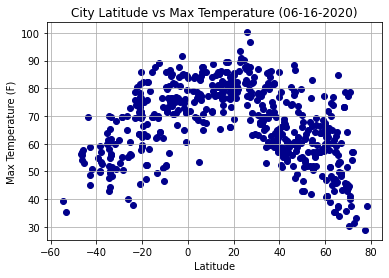

In [9]:
fig1,ax1=plt.subplots()
ax1.scatter(clean_city_data['Lat'],clean_city_data["Max Temp (F)"],color="darkblue")
ax1.set_ylabel("Max Temperature (F)")
ax1.set_xlabel("Latitude")
date=datetime.utcfromtimestamp(int(clean_city_data['Date'][0])).strftime('%m-%d-%Y')
ax1.set_title(f'City Latitude vs Max Temperature ({date})')
ax1.grid()
plt.savefig('Images/Fig1.png')
plt.show()

## Latitude vs. Humidity Plot

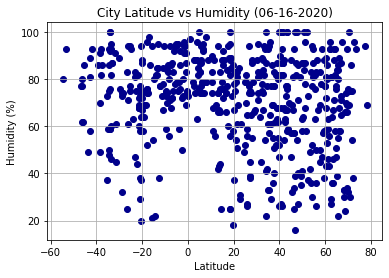

In [10]:
fig2,ax2=plt.subplots()
ax2.scatter(clean_city_data['Lat'],clean_city_data["Humidity (%)"],color="darkblue")
ax2.set_ylabel("Humidity (%)")
ax2.set_xlabel("Latitude")
date=datetime.utcfromtimestamp(int(clean_city_data['Date'][0])).strftime('%m-%d-%Y')
ax2.set_title(f'City Latitude vs Humidity ({date})')
ax2.grid()
plt.savefig('Images/Fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

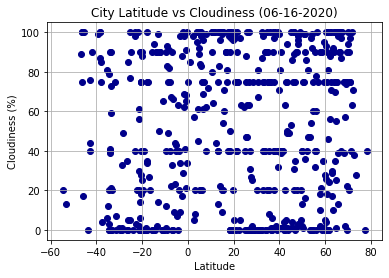

In [11]:
fig3,ax3=plt.subplots()
ax3.scatter(clean_city_data['Lat'],clean_city_data["Cloudiness (%)"],color="darkblue")
ax3.set_ylabel("Cloudiness (%)")
ax3.set_xlabel("Latitude")
date=datetime.utcfromtimestamp(int(clean_city_data['Date'][0])).strftime('%m-%d-%Y')
ax3.set_title(f'City Latitude vs Cloudiness ({date})')
ax3.grid()
plt.savefig('Images/Fig3.png')
plt.show()

## Latitude vs. Wind Speed Plot

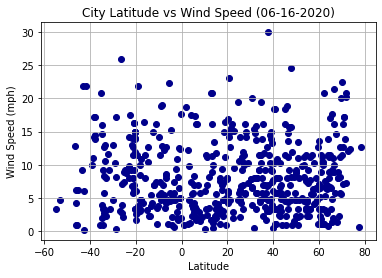

In [12]:
fig4,ax4=plt.subplots()
ax4.scatter(clean_city_data['Lat'],clean_city_data["Wind Speed"],color="darkblue")
ax4.set_ylabel("Wind Speed (mph)")
ax4.set_xlabel("Latitude")
date=datetime.utcfromtimestamp(int(clean_city_data['Date'][0])).strftime('%m-%d-%Y')
ax4.set_title(f'City Latitude vs Wind Speed ({date})')
ax4.grid()
plt.savefig('Images/Fig4.png')
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression (x_axis,y_axis,x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    fig,ax=plt.subplots()
    ax.scatter(x_axis,y_axis,color="darkblue")
    ax.plot(x_axis,regress_values,"r-")
    ax.annotate(line_eq,(x,y),fontsize=10,color="red")
    ax.annotate(f'r^2= {round(rvalue**2,2)}',(x,y-4),fontsize=10,color="red")
   

In [14]:
# Create Northern and Southern Hemisphere DataFrames
NH_df=clean_city_data.loc[clean_city_data['Lat']>0,:]
SH_df=clean_city_data.loc[clean_city_data['Lat']<=0,:]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

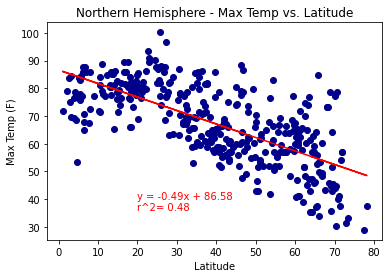

In [15]:
linear_regression(NH_df['Lat'],NH_df['Max Temp (F)'],20,40)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.savefig('Images/Fig5.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

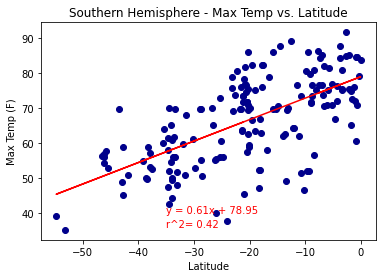

In [16]:
linear_regression(SH_df['Lat'],SH_df['Max Temp (F)'],-35,40)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.savefig('Images/Fig6.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

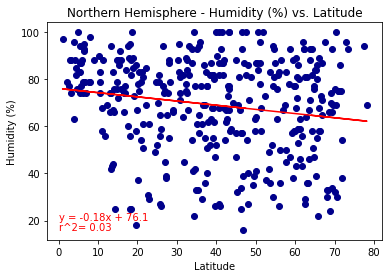

In [17]:
linear_regression(NH_df['Lat'],NH_df['Humidity (%)'],0,20)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.savefig('Images/Fig7.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

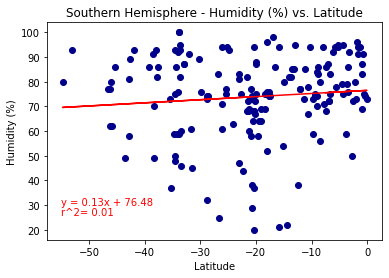

In [18]:
linear_regression(SH_df['Lat'],SH_df['Humidity (%)'],-55,30)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.savefig('Images/Fig8.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

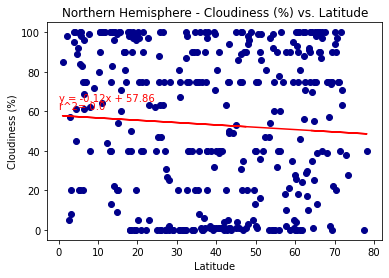

In [19]:
linear_regression(NH_df['Lat'],NH_df['Cloudiness (%)'],0,65)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.savefig('Images/Fig9.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

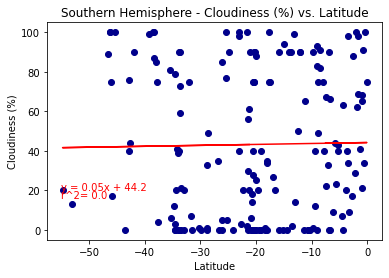

In [20]:
linear_regression(SH_df['Lat'],SH_df['Cloudiness (%)'],-55,20)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.savefig('Images/Fig10.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

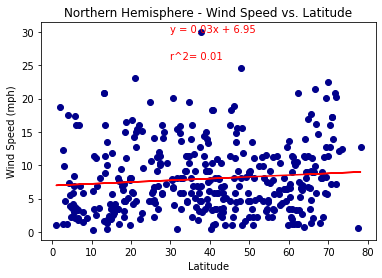

In [21]:
linear_regression(NH_df['Lat'],NH_df['Wind Speed'],30,30)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')
plt.savefig('Images/Fig11.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

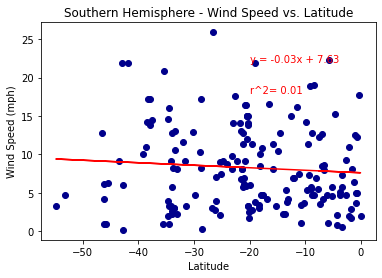

In [22]:
linear_regression(SH_df['Lat'],SH_df['Wind Speed'],-20,22)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.savefig('Images/Fig12.png')
plt.show()